---
# Cairo University Faculty of Engineering
## Machine Learning 
## Assignment 5 

---

Please write your full name here
- **Name** : "Ehab Kamal Soliman"

# Clustering

In this assignment, you will be exploring kmeans algorithms for clustering

--------------------

The k-means clustering is first given the wanted number of clusters, say k, as a hyperparameter. Next, to start the algorithm, k points from the data set are chosen randomly as cluster centres. Then the following phases are repeated iteratively:

- any data point is set to belong to a cluster, whose centre is closest to it
- then for each cluster a new centre is chosen as the average of the data points in the cluster
This procedure is repeated until the clusters no longer change. This kind of algorithm is called an Expectation-Maximization (EM) algorithm, which is known to converge.

In [1]:
from sklearn.datasets import make_moons, make_blobs
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import random 
import seaborn as sns
import pandas as pd
%matplotlib inline

In [2]:
X, y = make_moons(n_samples=250, noise=0.05, random_state=42)

In [3]:
X = pd.DataFrame(X)

# Question 0
Set random seed to 47

In [4]:
random.seed(47)

# Question 1
Scatter plot the dataset

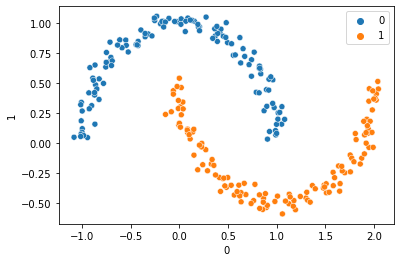

In [5]:
sns.scatterplot(x= X[0],y= X[1],hue=y);

# Question 2
In your opinon, how well will K-Means perform on the above dataset? Explain.

ANSWER: It won't perform well on this dataset because the classes are not clearly separated and k-means performs best with spherical shaped data.

# Question 3
1. Use Elbow method to find best "k". (Use inertia as metric).
2. Plot the elbow graph.
3. Train SKlearn KMeans model using "k = 2".
4. Scatter plot the data after clustering with colors
5. **Comment on the results.**

ANSWER:
- The elbow of the curve is at k = 4, so the best number of clusters for this data is 4.

In [6]:
inertias= []
for k in range(1,10):
    model = KMeans(n_clusters=k)
    model.fit(X)
    
    inertias.append(model.inertia_)

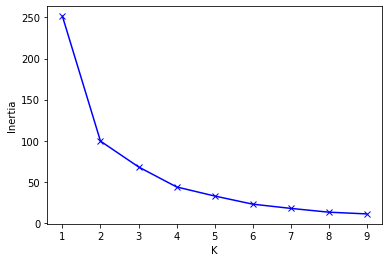

In [7]:
plt.plot(range(1,10),inertias,"bx-")
plt.xlabel("K")
plt.ylabel("Inertia");

In [8]:
kmeans_model = KMeans(n_clusters=2)
kmeans_model.fit(X)

KMeans(n_clusters=2)

<AxesSubplot:xlabel='0', ylabel='1'>

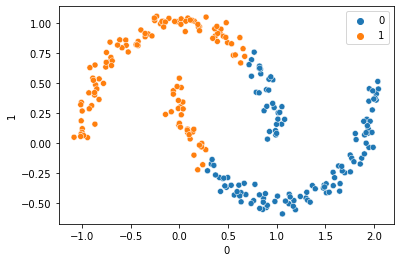

In [9]:
y_pred = kmeans_model.predict(X)
sns.scatterplot(x=X[0],y=X[1],hue=y_pred)

- Try DBSCAN algorithm on the same data with eps = 0.3
- Scatter plot the resulting clusters

In [10]:
from sklearn.cluster import DBSCAN
dbscan_model = DBSCAN(eps=0.3)
y_pred_dbscan = dbscan_model.fit_predict(X)

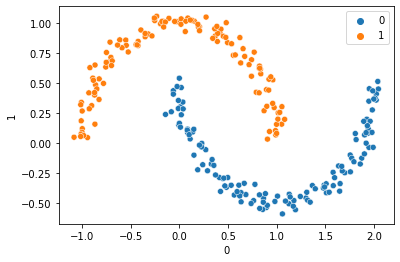

In [11]:
# y_pred_dbscan = dbscan_model.predict(X)
sns.scatterplot(x=X[0],y=X[1],hue=y_pred_dbscan);

**Compare between DBSCAN and kmeans results on the same data. Why do you think you got those results??**

ANSWER:
- the result of clustering with k-means isn't good as expected because the dataset isn't spherical and k-means performs best with spherical shaped data.
- the result of clustering with DBSCAN is good as the algorithm managed to cluster the 2 classes perfectly.

# Question 4
For the following dataset
1. Run kmeans algorithm clustering using k=2.
3. Plot results of algorithm.
4. Comment on the following
    * Why do kmeans fail to cluster such data?

ANSWER:
- the data is elongated so k-means failed to cluster it because k-means assumes that the data has spherical shape

In [12]:
n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state, centers=2)
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)

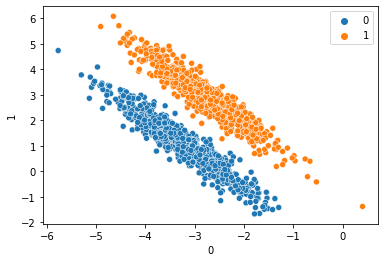

In [13]:
X = pd.DataFrame(X_aniso)
sns.scatterplot(x=X[0],y=X[1],hue=y);

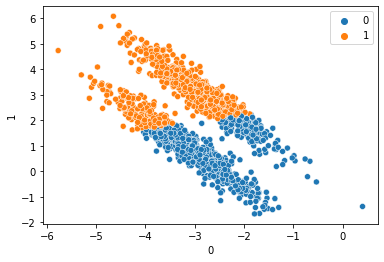

In [14]:
kmeans_model = KMeans(n_clusters=2)
y_pred = kmeans_model.fit_predict(X)
sns.scatterplot(x=X[0],y=X[1],hue=y_pred);

# Question 5
Write your own K-means clustering from scratch, where the Euclidian distance is used to evaluate
the distance/ similarity between the dataset. The input to this function should be:
* The number of clusters
* The dataset

The output should be:
* The list of cluster centers

In [15]:
def kmeans(n_clusters, dataset):
    # Initialize cluster centers randomly
    centers = dataset[np.random.choice(dataset.shape[0], n_clusters, replace=False), :]
    # Initialize cluster assignments
    clusters = np.zeros(dataset.shape[0])
    # Iterate until convergence
    while True:
        # Assign each data point to the closest cluster center
        for i in range(dataset.shape[0]):
            distances = np.sqrt(np.sum((dataset[i, :] - centers) ** 2, axis=1))
            clusters[i] = np.argmin(distances)
        # Update cluster centers to be the mean of their assigned data points
        new_centers = np.zeros((n_clusters, dataset.shape[1]))
        for j in range(n_clusters):
            new_centers[j, :] = np.mean(dataset[clusters == j, :], axis=0)
        # Check if the cluster centers have converged
        if np.allclose(centers, new_centers):
            break
        else:
            centers = new_centers
    return centers

# Question 6
For the following dataset:

In [16]:
from sklearn.datasets import make_blobs
X,y = make_blobs(centers=4, n_samples=200, random_state=0, cluster_std=0.7)
print(X[:10],y[:10])

[[ 2.26403424  1.82613379]
 [-0.97647444  2.59138889]
 [ 1.10046838  4.02254067]
 [-2.82715074  7.11970523]
 [ 1.53393915  0.31915668]
 [ 0.98362009  5.55389667]
 [-1.74452433  2.98606238]
 [ 0.35482006  2.9172298 ]
 [ 1.83747356  5.14545322]
 [ 1.48663347  4.39407536]] [1 2 0 3 1 0 2 0 0 0]


- Scatter plot the data **without** coloring the points using labels. 
- How many clusters do you see?

ANSWER: 
- i see 4 clusters

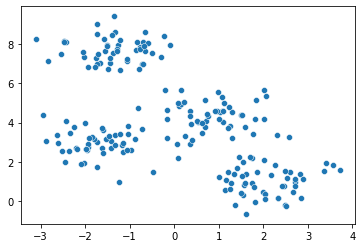

In [17]:
sns.scatterplot(x=X[:,0],y=X[:,1]);

# Question 7

- Use sklearn kmeans to cluster the ABOVE data with k = the number you chose in the above question
    - Print the clusters centers
    - Scatter plot the data and use the labels **predicted** by the model to color the points --> you should have as many colors in the plot as clusters
    - On the same plot, show the cluster centers

In [18]:
kmeans = KMeans(n_clusters=4)
predictions = kmeans.fit_predict(X)
cluster_centers = kmeans.cluster_centers_
print(cluster_centers)

[[ 0.86008475  4.31501411]
 [-1.36512238  7.70188306]
 [-1.70639178  2.9104771 ]
 [ 2.07464749  0.9869902 ]]


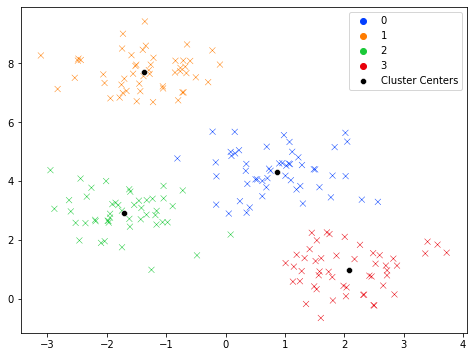

In [19]:
fig, ax = plt.subplots(figsize=(8,6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=predictions, ax=ax,marker="x",palette="bright")
sns.scatterplot(x=cluster_centers[:, 0], y=cluster_centers[:, 1], marker='o',  color='black',label="Cluster Centers", ax=ax);

- Calculate the accuracy score between kmeans prediction and the true blobs labels

In [20]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y,predictions))

0.49


- Why is the accuracy so low?

ANSWER: 
- because kmeans didn't assign the true labels to its clusters because those labels are unknows. So, the algorithm assigns arbitary label to every cluster it forms

# Question 8


- Write a function that takes the number of clusters, the true labels, and the model predictions
- The function should return a list **new labels** with length = number of clusters
- The function should modify the predicted label of each cluster to be the **mode** (most common **true** label) among the data points in the cluster
- Pseudocode:
    - For each predicted cluster:
        - Calculate mode of true labels of all points within the cluster
        - The mode is the **new label** for this cluster


In [21]:
def relabel(n_clusters, true_labels, pred_labels):
    new_labels = []
    for i in range(n_clusters):
        indices = pred_labels == i
        cluster_labels = true_labels[indices]
        mode_label = np.bincount(cluster_labels).argmax()
        new_labels.append(mode_label)
    return new_labels

In [22]:
n_clusters =4
true_labels=y 
pred_labels=predictions
new_labels = relabel(n_clusters, true_labels, pred_labels)
assert len(new_labels) == n_clusters

- Calculate the accuracy score of new labels for **ALL** data after relabeling data

In [23]:
new_predictions = []
for label in predictions:
    new_predictions.append(new_labels[label])
print("Accuracy score is", accuracy_score(y,new_predictions))

Accuracy score is 0.99


# Question 9
Write your own K-medoids clustering, where the Euclidian distance is used to evaluate the distance/ similarity between the dataset. The input to this function should be:
- The number of clusters
- The dataset

The output should be:
- The list of cluster centers

In [24]:
import numpy as np

def k_medoids(num_clusters, dataset):
    # Initialize medoids randomly
    medoids = np.array(list(range(num_clusters)))
    np.random.shuffle(medoids)
    medoids = dataset[medoids[:num_clusters]]

    # Initialize clusters
    clusters = np.zeros(dataset.shape[0])
    distances = np.zeros((dataset.shape[0], num_clusters))

    # Iterate until convergence
    while True:
        # Assign each data point to the closest medoid
        for i in range(num_clusters):
            distances[:,i] = np.sum(np.square(dataset - medoids[i]), axis=1)
        new_clusters = np.argmin(distances, axis=1)

        # If no points changed clusters, we have converged
        if np.array_equal(new_clusters, clusters):
            break

        # Update medoids as the point with the lowest total distance to its cluster
        for i in range(num_clusters):
            medoid_indices = np.where(new_clusters == i)[0]
            cluster_distances = distances[medoid_indices,i]
            medoids[i] = dataset[medoid_indices[np.argmin(cluster_distances)]]

        clusters = new_clusters

    return medoids, clusters

- Apply YOUR k-medoids clustering algorithm with 4 clusters 
- Scatter Plot the points clusters along with the cluster center (use symbols to distinguish the cluster center from cluster point and the color codes to distinguish between the 4 clusters).

- Use the data in the following link: https://www.stat.cmu.edu/~larry/all-of-statistics/=data/faithful.dat

In [25]:
data = pd.read_table("faithful.dat.txt",delimiter="\\s+").values

In [26]:
cluster_centers,predictions = k_medoids(num_clusters=4,dataset=data)

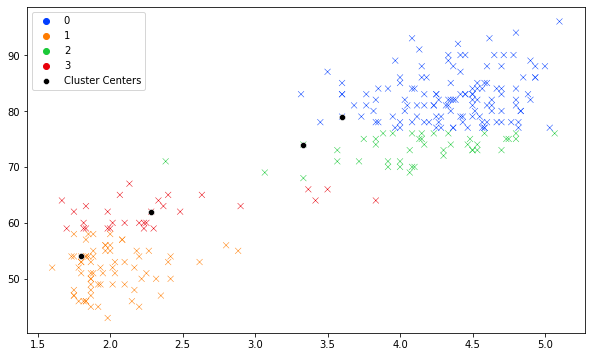

In [27]:
fig, ax = plt.subplots(figsize=(10,6))

sns.scatterplot(x=data[:, 0], y=data[:, 1], hue=predictions ,palette="bright", marker="x",ax=ax)
sns.scatterplot(x=cluster_centers[:,0],y=cluster_centers[:,1],markers="o",color="black",label="Cluster Centers",ax=ax);